In [2]:
from src import freesurfer_utils
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import nibabel as nib
from dataclasses import dataclass

In [3]:

class FreesurferSubject:
    def __init__(self, subject_path):
        self.subject_path = Path(subject_path)
        self.subject_id = self.subject_path.name
        self.curv = [nib.freesurfer.read_morph_data(str(self.subject_path / 'surf' / 'lh.curv')),
                         nib.freesurfer.read_morph_data(str(self.subject_path / 'surf' / 'rh.curv'))]
        #self.sphere = [nib.freesurfer.read_geometry(str(self.subject_path / 'surf' / 'lh.sphere')),
                         #  nib.freesurfer.read_geometry(str(self.subject_path / 'surf' / 'rh.sphere'))]
        #self.thickness = [nib.freesurfer.read_morph_data(str(self.subject_path / 'surf' / 'lh.thickness')),
                           #     nib.freesurfer.read_morph_data(str(self.subject_path / 'surf' / 'rh.thickness'))]
    
    
  

In [4]:
subjects_dir  = '/Users/benparker/Desktop/cnl/neurocluster/weiner/DevProso/subjects'
subjects_list = subjects_dir + '/all_subjects_list.txt'
subject_paths = freesurfer_utils.get_subjects_list(subjects_list = subjects_list, subjects_dir = subjects_dir)
subjects = [Path(subject_path).name for subject_path in subject_paths]


In [5]:
def get_gyrification_ratio(subject_curv_file: np.array):
    sub_sulc =  np.where(subject_curv_file > 0)[0]
    sub_gyr = np.where(subject_curv_file < 0)[0]
    return len(sub_gyr) / len(sub_sulc)



In [6]:
mfs = pd.read_csv('/Users/benparker/Desktop/cnl/DevProso/data/mfs.csv')
mfs.head()

,sub,hemi,label,vertices,total_surface_area,total_gray_matter_volume,cortical_thickness_mean,cortical_thickness_std,rectified_mean_curvature,rectified_Gaussian_curvature,...,Famous Face,Old-New,max_path_length,group,Sex,Age,FG1_lgi,FG2_lgi,FG3_lgi,FG4_lgi
0,1,rh,MFS,709,501,1251,2.670,0.627,0.104,0.015,...,NaN,NaN,65.449696,Controls,M,49,0.7,0.9,0.9,2.1
1,1,lh,MFS,1019,738,1578,2.514,0.393,0.108,0.014,...,NaN,NaN,62.765262,Controls,M,49,0.5,0.9,1.7,2.9
2,2,rh,MFS,470,351,706,2.503,0.328,0.117,0.016,...,0.43,0.93,32.592076,DPs,M,61,0.8,1.1,1.5,2.3
3,2,lh,MFS,751,561,1129,2.328,0.332,0.106,0.017,...,0.43,0.93,41.841137,DPs,M,61,0.9,1.0,1.7,2.3
4,3,rh,MFS,274,214,621,2.793,0.520,0.133,0.043,...,NaN,NaN,30.554775,Controls,F,52,0.6,0.6,1.6,1.6


In [8]:
gyr_ratio = pd.DataFrame(columns = ['subject', 'lh_gyrification_ratio', 'rh_gyrification_ratio', 'group'])
for i, sub in enumerate(subjects):
    subject_path = Path(subject_paths[i])
    subject = FreesurferSubject(subject_path)
    lh_gyrification_ratio = get_gyrification_ratio(subject.curv[0])
    rh_gyrification_ratio = get_gyrification_ratio(subject.curv[1])
    subject_group = mfs[mfs['sub'] == sub]['group'].values[0]
    gyr_ratio.loc[i, :] = {'subject': sub, 'lh_gyrification_ratio': lh_gyrification_ratio, 
                                  'rh_gyrification_ratio': rh_gyrification_ratio, 'group': subject_group}
    print(f"Completed subject: {sub}")

gyr_ratio.head()


Completed subject: 1
Completed subject: 10
Completed subject: 11
Completed subject: 12
Completed subject: 13
Completed subject: 14
Completed subject: 15
Completed subject: 16
Completed subject: 17
Completed subject: 18
Completed subject: 19
Completed subject: 2
Completed subject: 20
Completed subject: 21
Completed subject: 22
Completed subject: 23
Completed subject: 24
Completed subject: 25
Completed subject: 26
Completed subject: 27
Completed subject: 28
Completed subject: 29
Completed subject: 3
Completed subject: 30
Completed subject: 31
Completed subject: 32
Completed subject: 33
Completed subject: 34
Completed subject: 35
Completed subject: 36
Completed subject: 37
Completed subject: 38
Completed subject: 39
Completed subject: 4
Completed subject: 40
Completed subject: 41
Completed subject: 42
Completed subject: 43
Completed subject: 44
Completed subject: 45
Completed subject: 46
Completed subject: 47
Completed subject: 5
Completed subject: 6
Completed subject: 7
Completed subject

,subject,lh_gyrification_ratio,rh_gyrification_ratio,group
0,1,1.092699,1.07893,Controls
1,10,1.076417,1.077424,Controls
2,11,1.089054,1.089005,Controls
3,12,1.095601,1.072004,Controls
4,13,1.080415,1.09063,Controls


In [9]:
lh_dp_mean = gyr_ratio[gyr_ratio['group'] == 'DPs']['lh_gyrification_ratio'].mean()
rh_dp_mean = gyr_ratio[gyr_ratio['group'] == 'DPs']['rh_gyrification_ratio'].mean()
lh_control_mean = gyr_ratio[gyr_ratio['group'] == 'Controls']['lh_gyrification_ratio'].mean()
rh_control_mean = gyr_ratio[gyr_ratio['group'] == 'Controls']['rh_gyrification_ratio'].mean()

In [10]:
print(f"DP mean gyrification ratio: {lh_dp_mean}, {rh_dp_mean}")
print(f"Control mean gyrification ratio: {lh_control_mean}, {rh_control_mean}")

DP mean gyrification ratio: 1.0861832792187418, 1.0861853571231281
Control mean gyrification ratio: 1.092563650001628, 1.0840583712590703


In [11]:
from scipy.stats import ttest_ind
lh_ttest = ttest_ind(gyr_ratio[gyr_ratio['group'] == 'DPs']['lh_gyrification_ratio'].tolist(), gyr_ratio[gyr_ratio['group'] == 'Controls']['lh_gyrification_ratio'].tolist())
rh_ttest = ttest_ind(gyr_ratio[gyr_ratio['group'] == 'DPs']['rh_gyrification_ratio'].tolist(), gyr_ratio[gyr_ratio['group'] == 'Controls']['rh_gyrification_ratio'].tolist())

Left hemisphere ttest: t = -1.6107174615064477 | p = 0.11118018427618094
Right hemisphere ttest: t = 0.5075424454001416 | p = 0.6131706719954104


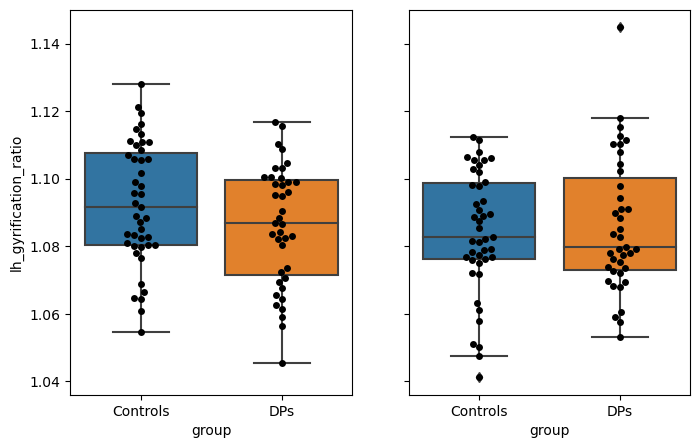

In [12]:

fig, ax = plt.subplots(figsize = (8, 5), nrows = 1, ncols = 2, sharey=True)
sns.swarmplot(x = 'group', y = 'lh_gyrification_ratio', data = gyr_ratio, ax=ax[0], color='black')
sns.boxplot(x = 'group', y = 'lh_gyrification_ratio', data = gyr_ratio, ax=ax[0])
sns.swarmplot(x = 'group', y = 'rh_gyrification_ratio', data = gyr_ratio, ax=ax[1], color='black')
sns.boxplot(x = 'group', y = 'rh_gyrification_ratio', data = gyr_ratio, ax=ax[1])

print(f"Left hemisphere ttest: t = {lh_ttest[0]} | p = {lh_ttest[1]}")
print(f"Right hemisphere ttest: t = {rh_ttest[0]} | p = {rh_ttest[1]}")

## Gyrification ratio by surface area

In [31]:
subjects_dir
all_stats_df = pd.DataFrame(columns=['sub', 'hemi', 'label', 'num_vertices', 'surface_area_mm^2', 'gray_matter_volume_mm^3', 'avg_cortical_thickness', 'avg_cortical_thickness_std', 'rectified_mean_curvature', 'rectified_gaussian_curvature', 'folding_index', 'intrinsic_curvature'])
gyr_ratio_df = pd.DataFrame(columns=['sub', 'hemi', 'lh_gyr_ratio', 'rh_gyr_ratio'])

for sub in ['1']:
    for hemi in ['rh', 'lh']:
        for cort_type in ['gyri', 'sulci']:
            txt_path = Path(f"{subjects_dir}") / f"{sub}/label/{hemi}.cortex_{cort_type}.stats.txt"

            with open(txt_path, 'r') as fp:
                new_surf = fp.readlines()
            
            row_stats = new_surf[-1]
            row_stats = row_stats.split(' ')
            row_stats = [i for i in row_stats if i != '']
            print(new_surf)
            label_name = row_stats[-1][:-1].split('.')[1]

            all_stats_row = [sub, hemi, label_name, row_stats[0], row_stats[1], row_stats[2], row_stats[3], row_stats[4], row_stats[5], row_stats[6], row_stats[7], row_stats[8]]
            
            all_stats_df.loc[len(all_stats_df)] = all_stats_row

            

['Using TH3 vertex volume calc\n', 'Total face volume 247138\n', 'Total vertex volume 244212 (mask=0)\n', '\n', 'table columns are:\n', '    number of vertices\n', '    total surface area (mm^2)\n', '    total gray matter volume (mm^3)\n', '    average cortical thickness +- standard deviation (mm)\n', '    integrated rectified mean curvature\n', '    integrated rectified Gaussian curvature\n', '    folding index\n', '    intrinsic curvature index\n', '    structure name\n', '\n', '71838  45319  158512  2.576 0.585     0.129     0.033     1239    81.1  rh.cortex_gyri.label\n']
12
12
['Using TH3 vertex volume calc\n', 'Total face volume 247138\n', 'Total vertex volume 244212 (mask=0)\n', '\n', 'table columns are:\n', '    number of vertices\n', '    total surface area (mm^2)\n', '    total gray matter volume (mm^3)\n', '    average cortical thickness +- standard deviation (mm)\n', '    integrated rectified mean curvature\n', '    integrated rectified Gaussian curvature\n', '    folding i

In [32]:
def subject_label_stats2DataFrame(subjects_dir: str or Path, subject_list: list, label_name: str or list, hemi: str, data_dir_from_subject_fs_dir:str = 'label') -> pd.DataFrame:
    """ 
    Takes a subject list, label list, and the location of a stats.txt file outputted by mris_anatomical_stats ->> converts it to a dataframe

    

    """

    ## check for subject existence
    ## check for data_dir
    ## check for txt existence


    assert hemi in ['lh', 'rh', 'both'], "hemi must be 'lh', 'rh', or 'both'"
    if hemi == 'both':
        hemi_list = ['lh', 'rh']
    else:
        hemi_list = [hemi]

    if isinstance(label_name, str):
        label_name = [label_name]
    
    if isinstance(subjects_dir, str):
        subjects_dir = Path(subjects_dir)

    
    for sub in subject_list:
        for hemi in hemi_list:
            for label in label_name:
                txt_basename = f"{hemi}.{label_name}.stats.txt"
                data_dir = subjects_dir / sub / data_dir_from_subject_fs_dir / txt_basename
                new_row = mris_anatomical_stats2DataFrame_row(subject, label, hemi, )


In [35]:

def mris_anatomical_stats2DataFrame_row(subject: str, label_name: str, hemi: str, data_dir: str or Path) -> pd.DataFrame:
    """ 
    Takes a subject list and the location of a stats.txt file outputted by mris_anatomical_stats ->> converts it to a dataframe



    """

    assert hemi in ['lh', 'rh'], "hemi must be 'lh' or 'rh'"

    if isinstance(data_dir, str):
        data_dir = Path(data_dir)



    txt_path = data_dir / f"{hemi}.{label_name}.stats.txt"
    assert txt_path.exists(), f'the file {txt_path} does not exist.'

    all_stats_df = pd.DataFrame(columns=['sub', 'hemi', 'label', 'num_vertices', 'surface_area_mm^2', 'gray_matter_volume_mm^3', 'avg_cortical_thickness', 'avg_cortical_thickness_std', 'rectified_mean_curvature', 'rectified_gaussian_curvature', 'folding_index', 'intrinsic_curvature'])

    with open(txt_path, 'r') as fp:
        new_surf = fp.readlines()
    
    row_stats = new_surf[-1]
    row_stats = row_stats.split(' ')
    row_stats = [i for i in row_stats if i != '']
    print(new_surf)
    label_name = row_stats[-1][:-1].split('.')[1]

    all_stats_row = [subject, hemi, label_name, row_stats[0], row_stats[1], row_stats[2], row_stats[3], row_stats[4], row_stats[5], row_stats[6], row_stats[7], row_stats[8]]
    
    all_stats_df.loc[len(all_stats_df)] = all_stats_row

    return all_stats_df



In [37]:
mris_anatomical_stats2DataFrame_row('1', 'cortex_gyri', 'lh', '/Users/benparker/Desktop/cnl/neurocluster/weiner/DevProso/subjects/1/label')

['Using TH3 vertex volume calc\n', 'Total face volume 245499\n', 'Total vertex volume 242202 (mask=0)\n', '\n', 'table columns are:\n', '    number of vertices\n', '    total surface area (mm^2)\n', '    total gray matter volume (mm^3)\n', '    average cortical thickness +- standard deviation (mm)\n', '    integrated rectified mean curvature\n', '    integrated rectified Gaussian curvature\n', '    folding index\n', '    intrinsic curvature index\n', '    structure name\n', '\n', '71279  45161  157986  2.575 0.604     0.128     0.032     1187    80.5  lh.cortex_gyri.label\n']


,sub,hemi,label,num_vertices,surface_area_mm^2,gray_matter_volume_mm^3,avg_cortical_thickness,avg_cortical_thickness_std,rectified_mean_curvature,rectified_gaussian_curvature,folding_index,intrinsic_curvature
0,1,lh,cortex_gyri,71279,45161,157986,2.575,0.604,0.128,0.032,1187,80.5
